# Session 1 Further work
These are example solutions of the further work given

In [1]:
# We always start with appropriate imports; note the use of the IPython magic
# command to set up Matplotlib within the notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### 3. Arrays in NumPy

#### Question 1
We will create two 2D arrays to test the operators.

In [2]:
a = np.reshape(np.arange(9),(3,3))
b = np.reshape(np.arange(1,10),(3,3))
print("a:\n",a)
print("b:\n",b)
print("a + b:\n",a+b)
print("a * b:\n",a*b)
print("a dot b:\n",np.dot(a,b))

a:
 [[0 1 2]
 [3 4 5]
 [6 7 8]]
b:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
a + b:
 [[ 1  3  5]
 [ 7  9 11]
 [13 15 17]]
a * b:
 [[ 0  2  6]
 [12 20 30]
 [42 56 72]]
a dot b:
 [[ 18  21  24]
 [ 54  66  78]
 [ 90 111 132]]


We can see that the normal arithmetical operators `+` and `*` operate element by element, so that the result is `a[i,j] + b[i,j]` or `a[i,j] * b[i,j]` (in matrix terms, we have $a_{ij} + b_{ij}$).  `np.dot` performs a matrix multiply (you can also write `a.dot(b)` but I personally find that a little confusing).

#### Question 2
We start by setting alternating rows to 1 using steps in the first index.

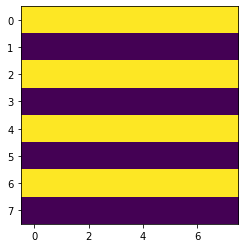

In [3]:
c = np.zeros((8,8))
c[::2,:] = 1
plt.imshow(c)

Now we set alternating *columns* to 1

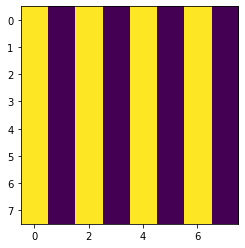

In [4]:
c = np.zeros((8,8))
c[:,::2] = 1
plt.imshow(c)

What happens if we combine these two? It's not quite what we might expect at first.

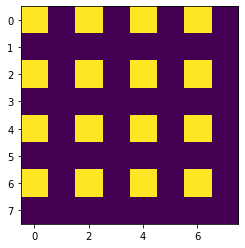

In [5]:
c = np.zeros((8,8))
c[::2,::2] = 1
plt.imshow(c)

#### Question 3
To make a chessboard, we need to alternate 0 and 1, but starting at a different location in even and odd rows.

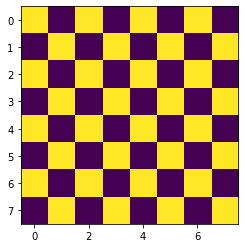

In [6]:
c = np.zeros((8,8))
c[0::2,0::2] = 1
c[1::2,1::2] = 1
plt.imshow(c)

### 4. Plotting with matplotlib

I will present the complete solution below, rather than working through the sub-parts. It should be clear how the solution answers the parts.

In [7]:
c = 0.5
phi = 0.5*(1+np.sqrt(5))
n = np.arange(1000)
r = c*np.sqrt(n)
theta = n*2*np.pi/(1+phi)

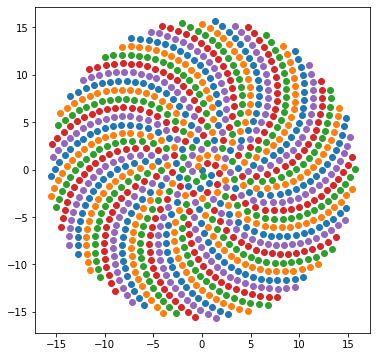

In [8]:
x = r*np.cos(theta)
y = r*np.sin(theta)
plt.rcParams['figure.figsize'] = 6,6
for n in range(5):
    plt.plot(x[n::5],y[n::5],'o')

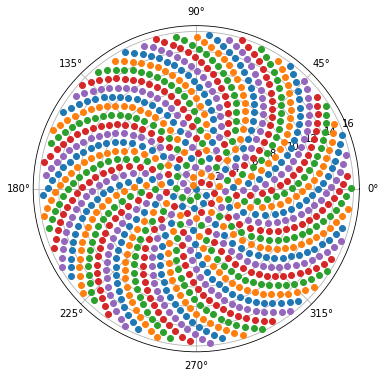

In [9]:
for n in range(5):
    plt.polar(theta[n::5],r[n::5],'o')

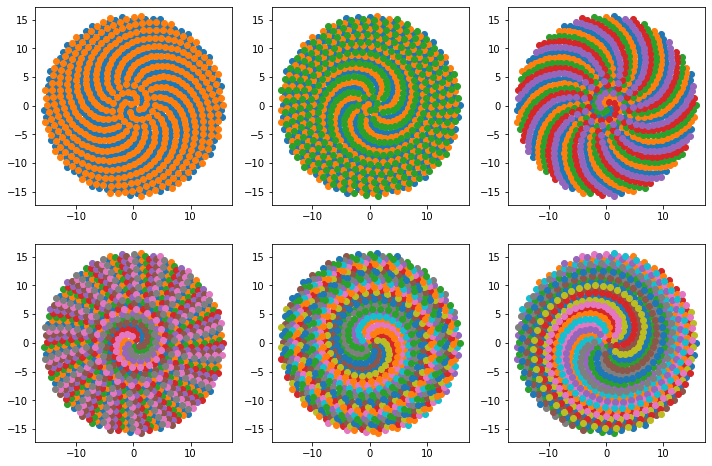

In [10]:
# Define array of six Fibonacci numbers starting from two (for simplicity)
fib = [2,3,5,8,13,21]
plt.rcParams['figure.figsize'] = 12,8
for m in range(6):
    step = fib[m]
    plt.subplot(2,3,m+1) # Sub-plots numbered from 1...
    for n in range(step):
        plt.plot(x[n::step],y[n::step],'o')

### 5. Loops and control

#### Questions 1 & 2
Note that using `delta=0.005` as below will require 15-30 seconds to run; making it larger will reduce the run time.

In [11]:
delta = 0.005
lim = [-2,0.6,-1.2,1.2]
x = np.arange(lim[0],lim[1]+delta,delta)
y = np.arange(lim[2],lim[3]+delta,delta)
n_samp_x = len(x)
n_samp_y = len(y)
res = np.zeros((n_samp_y,n_samp_x))

#### Questions 3 , 4 & 5
If you want to see a simple two colour image (`plt.imshow` will likely default to blue and yellow, not black and white!), then change the code so that `res` is zero if `iters>=70` and one otherwise.

In [12]:
for i, x0 in enumerate(x):
    for j, y0 in enumerate(y):
        z = [0,0]
        iters = 0
        z = [z[0]*z[0]-z[1]*z[1]+x0,2*z[0]*z[1]+y0]
        mag = z[0]*z[0]+z[1]*z[1]
        while (mag<4.0) and (iters<70):
            z = [z[0]*z[0]-z[1]*z[1]+x0,2*z[0]*z[1]+y0]
            mag = z[0]*z[0]+z[1]*z[1]
            iters += 1
        res[j,i]=1-np.sqrt(iters/70)

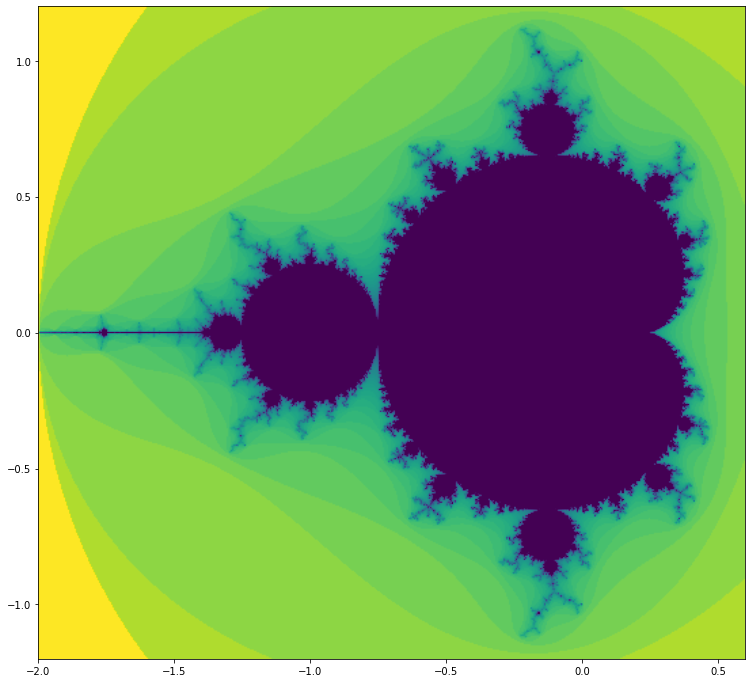

In [13]:
plt.rcParams['figure.figsize'] = 18,12
plt.imshow(res, interpolation='bilinear',origin='lower',extent=lim)

### 6. Functions

#### Question 1
This is actually a more general function that splits an array into multiple sub-arrays; we test with a simple integer array afterwards.

In [14]:
def split_array_into_n(array,n):
    """Split array into n sub-arrays and return as list"""
    b = []
    for i in range(n):
        b.append(array[i::n])
    return b

In [15]:
a = np.arange(20)
b = split_array_into_n(a,2)
print(b)

[array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18]), array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])]


#### Question 2
Similarly, a general interleaving function, with a simple test at the end, reversing the previous splitting. 

In [16]:
def interleave_n_arrays(array_list,n):
    """Interleave n arrays in input (array_list) into one array"""
    length = sum([len(array_list[i]) for i in range(n)])
    out = np.zeros(length)
    for i in range(n):
        out[i::n] = array_list[i]
    return out

In [17]:
c = interleave_n_arrays(b,2)
print(c)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19.]


#### Question 3

In [18]:
def mandelbrot_iteration(x0,y0):
    """Perform Mandelbrot iteration on number (x0+iy0) and return iterations"""
    z = [0,0]
    iters = 0
    z = [z[0]*z[0]-z[1]*z[1]+x0,2*z[0]*z[1]+y0]
    mag = z[0]*z[0]+z[1]*z[1]
    while (mag<4.0) and (iters<70):
        z = [z[0]*z[0]-z[1]*z[1]+x0,2*z[0]*z[1]+y0]
        mag = z[0]*z[0]+z[1]*z[1]
        iters += 1
    return iters

In [19]:
res_fun = np.zeros((n_samp_y,n_samp_x))
for i, x0 in enumerate(x):
    for j, y0 in enumerate(y):
        res_fun[j,i]=1-np.sqrt(mandelbrot_iteration(x0,y0)/70)

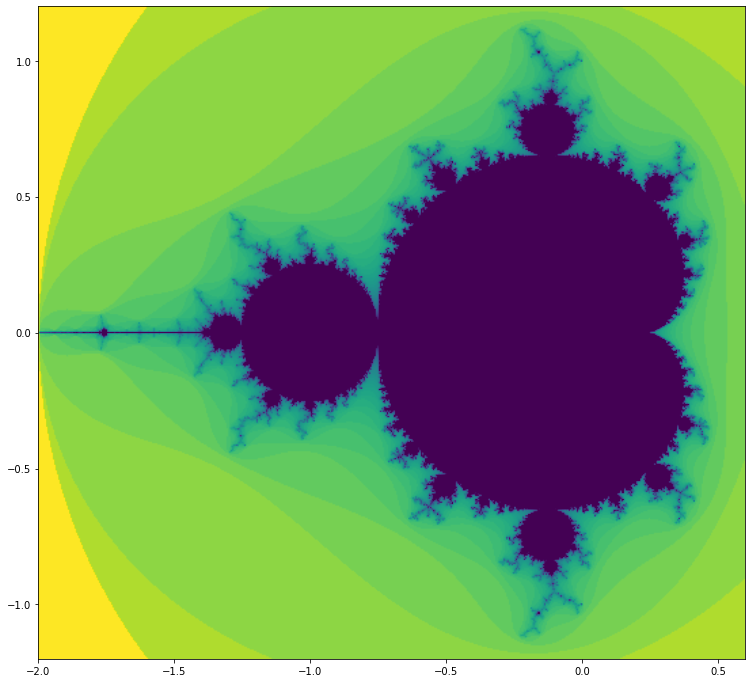

In [20]:
plt.rcParams['figure.figsize'] = 18,12
plt.imshow(res, interpolation='bilinear',origin='lower',extent=lim)